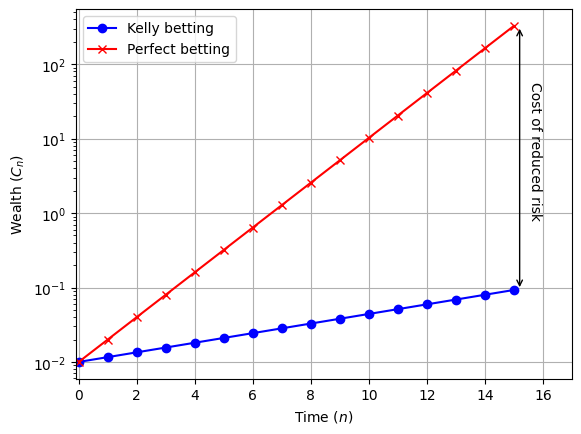

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
games = 15  # number of games played
p = 0.7     # success probability
S_0 = 0.01  # initial wealth
b = 2 * p - 1  # Kelly bet - fraction of the capital for each bet

# Initialize wealth arrays
S_perfect = np.zeros(games + 1)
S_Kelly_theor = np.zeros(games + 1)

S_perfect[0] = S_0
S_Kelly_theor[0] = S_0

# Theoretical calculation
for i_g in range(games):
    S_perfect[i_g + 1] = 2 * S_perfect[i_g]
    S_Kelly_theor[i_g + 1] = 2 * S_Kelly_theor[i_g] * (2 * p**2 - 2 * p + 1)

t = np.arange(games + 1)

plt.figure()
plt.semilogy(t, S_Kelly_theor, 'b-o', label='Kelly betting')
plt.semilogy(t, S_perfect, 'r-x', label='Perfect betting')
plt.legend()
plt.grid(True)
plt.xlabel(r'Time ($n$)')
plt.ylabel(r'Wealth ($C_{n}$)')  # Use LaTeX for subscript

plt.xlim([-0.1, 17])

# --- Add vertical double-sided arrow for "Cost of reduced risk" ---
arrow_x = games + 0.2
y1 = S_Kelly_theor[-1]
y2 = S_perfect[-1]
mid_y = (y1 + y2) / 2

plt.annotate(
    '', xy=(arrow_x, y2), xytext=(arrow_x, y1),
    arrowprops=dict(arrowstyle='<->', color='k', lw=1)
)
plt.text(arrow_x + 0.3, mid_y - 157, "Cost of reduced risk", va='center', ha='left', rotation=270, color='k')
plt.show()

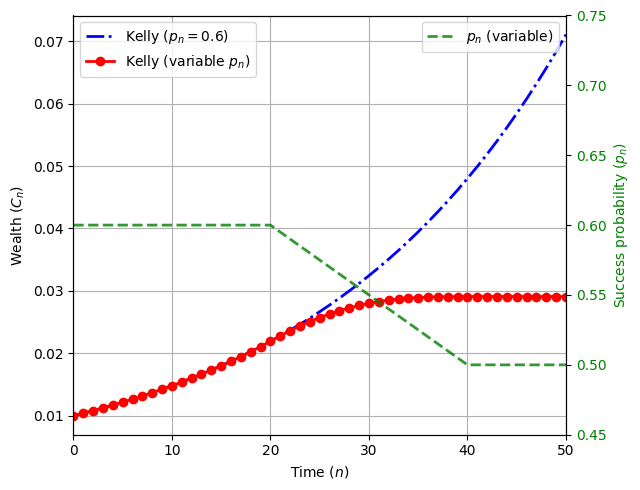

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 50
C0 = 0.01
t = np.arange(N+1)

# Success probability sequences
p_stationary = np.full(N+1, 0.6)

p_nonstationary = np.zeros(N+1)
for i in range(N+1):
    if i < 20:
        p_nonstationary[i] = 0.6
    elif i < 40:
        p_nonstationary[i] = 0.6 - (i-20)*(0.1/20)
    else:
        p_nonstationary[i] = 0.5

# Kelly fraction
def kelly_fraction(p):
    return 2*p - 1

# Wealth evolution (expected Kelly growth)
def simulate_wealth(p_seq, C0):
    C = np.zeros(N+1)
    C[0] = C0
    for n in range(N):
        p = p_seq[n]
        f = kelly_fraction(p)
        growth = p*(1+f) + (1-p)*(1-f)
        C[n+1] = C[n] * growth
    return C

# Simulate
C_stat = simulate_wealth(p_stationary, C0)
C_nonstat = simulate_wealth(p_nonstationary, C0)

# ---- Plot ----
plt.figure(figsize=(6.5, 5)) 

plt.plot(t, C_stat, 'b-.', linewidth=2, label=r'Kelly ($p_n = 0.6$)')
plt.plot(t, C_nonstat, 'r-o', markersize=6, linewidth=2, label=r'Kelly (variable $p_n$)')

plt.grid(True)
plt.xlabel(r'Time ($n$)')
plt.ylabel(r'Wealth ($C_n$)')
plt.xlim([0, N])
plt.legend()

# ---- Second axis for p_n ----
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(t, p_nonstationary, 'g--', linewidth=2, alpha=0.8)
ax2.set_ylabel(r'Success probability ($p_n$)', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0.45, 0.75)
ax2.legend([r'$p_n$ (variable)'], loc='upper right')

plt.tight_layout()
plt.show()
